# Advanced Image Classification with ImageNet

In this assignment, you will be asked to develop a convolutional neural network (CNN) to classify images from the CIFAR-100 dataset. At each step, you'll be guided through the process of developing a model architecture to solve a problem. Your goal is to create a CNN that attains at least 55% accuracy on the validation set.

### The CIFAR-100 Dataset

The [CIFAR-100 dataset](https://www.cs.toronto.edu/~kriz/cifar.html) consists of 60000 32x32 colour images in 100 classes, with 600 images per class. There are 50000 training images and 10000 test images. The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 500 images from each class.

### Tools

You will use Keras with TensorFlow to develop your CNN. For this assignment, it's strongly recommended that you use a GPU to accelerate your training, or else you might find it difficult to train your network in a reasonable amount of time. If you have a computer with a GPU that you wish to use, you can follow the [TensorFlow instructions](https://www.tensorflow.org/install/) for installing TensorFlow with GPU support. Otherwise, you can use [Google Colab](https://colab.research.google.com/) to complete this assignment. Colab provides free access to GPU-enabled machines. If you run into any issues, please contact us as soon as possible so that we can help you resolve them.

## Task 1: Data Exploration and Preprocessing (Complete or Incomplete)
### 1a: Load and Explore the Dataset
- Use the code below to download the dataset.
- Explore the dataset: examine the shape of the training and test sets, the dimensions of the images, and the number of classes. Show a few examples from the training set.

In [1]:
from keras.datasets import cifar100

# Load the CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 19s 0us/step


In [2]:
class_names = [
    "apple", "aquarium_fish", "baby", "bear", "beaver", "bed", "bee", "beetle", "bicycle", "bottle",
    "bowl", "boy", "bridge", "bus", "butterfly", "camel", "can", "castle", "caterpillar", "cattle",
    "chair", "chimpanzee", "clock", "cloud", "cockroach", "couch", "crab", "crocodile", "cup", "dinosaur",
    "dolphin", "elephant", "flatfish", "forest", "fox", "girl", "hamster", "house", "kangaroo", "keyboard",
    "lamp", "lawn_mower", "leopard", "lion", "lizard", "lobster", "man", "maple_tree", "motorcycle", "mountain",
    "mouse", "mushroom", "oak_tree", "orange", "orchid", "otter", "palm_tree", "pear", "pickup_truck", "pine_tree",
    "plain", "plate", "poppy", "porcupine", "possum", "rabbit", "raccoon", "ray", "road", "rocket",
    "rose", "sea", "seal", "shark", "shrew", "skunk", "skyscraper", "snail", "snake", "spider",
    "squirrel", "streetcar", "sunflower", "sweet_pepper", "table", "tank", "telephone", "television", "tiger", "tractor",
    "train", "trout", "tulip", "turtle", "wardrobe", "whale", "willow_tree", "wolf", "woman", "worm"
]

Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Test data shape: (10000, 32, 32, 3)
Test labels shape: (10000, 1)


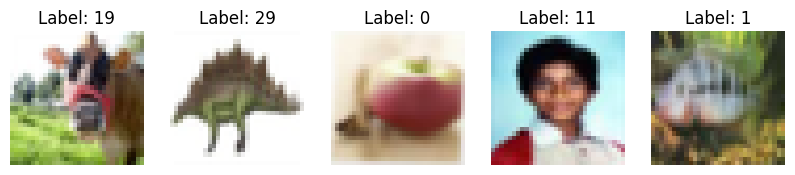

In [3]:
import matplotlib.pyplot as plt

print(f"Training data shape: {x_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Test data shape: {x_test.shape}")
print(f"Test labels shape: {y_test.shape}")

# Display a few example images with their labels
fig, axes = plt.subplots(1, 5, figsize=(10, 2))
for i, ax in enumerate(axes):
    ax.imshow(x_train[i])
    ax.set_title(f"Label: {y_train[i][0]}")
    ax.axis('off')
plt.show()

### 1b: Data Preprocessing
- With the data downloaded, it's time to preprocess it. Start by normalizing the images so that they all have pixel values in the range [0, 1].
- Next, convert the labels to one-hot encoded vectors.
- Finally, split the training set into training and validation sets. Use 80% of the training set for training and the remaining 20% for validation.

In [4]:
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Normalize the images
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot encode labels
y_train = to_categorical(y_train, 100)
y_test = to_categorical(y_test, 100)

# Split the training set into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

print(f"Training set size: {x_train.shape[0]}")
print(f"Validation set size: {x_val.shape[0]}")

Training set size: 40000
Validation set size: 10000


## Task 2: Model Development (Complete or Incomplete)
### Task 2a: Create a Baseline CNN Model
- Design a CNN architecture. Your architecture should use convolutional layers, max pooling layers, and dense layers. You can use any number of layers, and you can experiment with different numbers of filters, filter sizes, strides, padding, etc. The design doesn't need to be perfect, but it should be unique to you.
- Print out the model summary.

In [16]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(100, activation='softmax'))

model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_13 (Conv2D)                   │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 100)                 │         204,900 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 298,148 (1.14 MB)

 Trainable params: 298,148 (1.14 MB)

 Non-trainable params: 0 (0.00 B)

### Task 2b: Compile the model

- Select an appropriate loss function and optimizer for your model. These can be ones we have looked at already, or they can be different.
- Briefly explain your choices (one or two sentences each).
- <b>Loss function:</b> ______
- <b>Optimizer:</b> ______

In [17]:
from keras import optimizers

from keras.optimizers import Adam

# Compile the model
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## Task 3: Model Training and Evaluation (Complete or Incomplete)
### Task 3a: Train the Model

- Train your model for an appropriate number of epochs. Explain your choice of the number of epochs used - you can change this number before submitting your assignment.
- Use a batch size of 32.
- Use the validation set for validation.

In [18]:
history = model.fit(
    x_train, y_train,
    epochs=15,
    batch_size=32,
    validation_data=(x_val, y_val)
)

Epoch 1/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.0929 - loss: 4.0420 - val_accuracy: 0.2550 - val_loss: 3.0668
Epoch 2/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.2872 - loss: 2.8970 - val_accuracy: 0.3320 - val_loss: 2.7069
Epoch 3/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.3958 - loss: 2.4055 - val_accuracy: 0.3621 - val_loss: 2.5722
Epoch 4/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4633 - loss: 2.0769 - val_accuracy: 0.3767 - val_loss: 2.5511
Epoch 5/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5224 - loss: 1.8054 - val_accuracy: 0.3952 - val_loss: 2.4879
Epoch 6/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5709 - loss: 1.5777 - val_accuracy: 0.3922 - val_loss: 2.5608
Epoch 7/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6276 - loss: 1.3661 - val_accuracy: 0.3868 - val_loss: 2.6447
Epoch 8/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6612 - loss: 1.2036 - 

### Task 3b: Accuracy and other relevant metrics on the test set

- Report the accuracy of your model on the test set.
- While accuracy is a good metric, there are many other ways to numerically evaluate a model. Report at least one other metric, and explain what it measures and how it is calculated.

- <b>Accuracy:</b> 36.61%
- <b>Other metric:</b> F1 score
- <b>Reason for selection:</b> F1 score is a good combination of the precision (how many predicted positives are actually positives) and recall (how many actual positives were correctly predicted). Its helpful to know how the model performs to correctly predict positives and minimize false negatives.
- <b>Value of metric:</b> 37.5%
- <b>Interpretation of metric value:</b> This is a low score which means the model is not doing a good job of balancing false positives and false negatives. Might have low precision and low recall.

In [22]:
from sklearn.metrics import classification_report
import numpy as np

# Evaluate on test data
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Generate a classification report
report = classification_report(y_true, y_pred_classes, output_dict=True)
print(f"Accuracy: {test_acc}")
print(f"Precision, Recall, F1-Score (Macro): {report['macro avg']}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Accuracy: 0.366100013256073
Precision, Recall, F1-Score (Macro): {'precision': 0.389240812895157, 'recall': 0.3660999999999999, 'f1-score': 0.3705081139612421, 'support': 10000.0}


### Task 3c: Visualize the model's learning

- Plot the training accuracy and validation accuracy with respect to epochs.
- Select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.
- Briefly discuss the results. What do the plots show? Do the results make sense? What do the classification probabilities indicate?

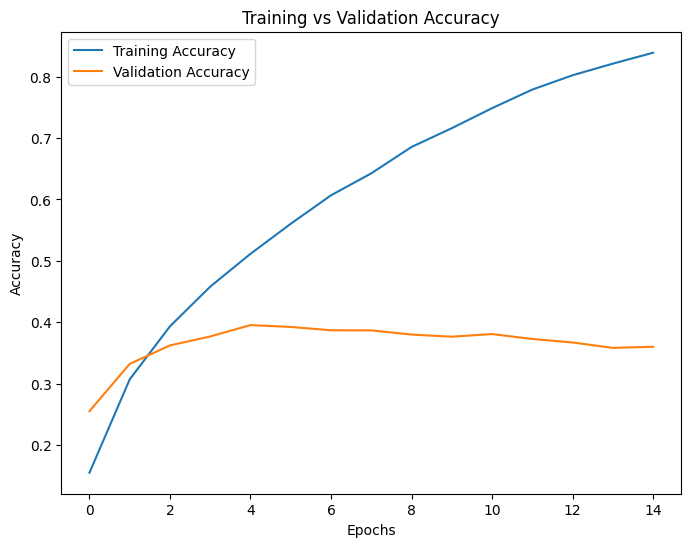

In [23]:
# Plot training and validation accuracy
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.show()

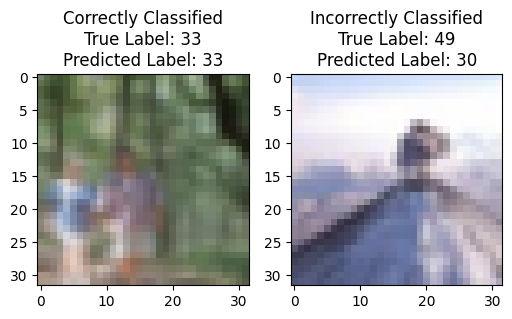


Correctly Classified - Prediction Probabilities:
Class 0: 0.0000
Class 1: 0.0000
Class 2: 0.0001
Class 3: 0.0006
Class 4: 0.0000
Class 5: 0.0000
Class 6: 0.0000
Class 7: 0.0000
Class 8: 0.0000
Class 9: 0.0000
Class 10: 0.0000
Class 11: 0.0000
Class 12: 0.0000
Class 13: 0.0000
Class 14: 0.0000
Class 15: 0.0001
Class 16: 0.0000
Class 17: 0.0000
Class 18: 0.0136
Class 19: 0.0000
Class 20: 0.0000
Class 21: 0.0000
Class 22: 0.0000
Class 23: 0.0000
Class 24: 0.0000
Class 25: 0.0000
Class 26: 0.0000
Class 27: 0.0002
Class 28: 0.0000
Class 29: 0.0001
Class 30: 0.0000
Class 31: 0.0005
Class 32: 0.0009
Class 33: 0.5552
Class 34: 0.0000
Class 35: 0.0002
Class 36: 0.0000
Class 37: 0.0005
Class 38: 0.0000
Class 39: 0.0000
Class 40: 0.0000
Class 41: 0.0000
Class 42: 0.0001
Class 43: 0.0000
Class 44: 0.0000
Class 45: 0.0000
Class 46: 0.0000
Class 47: 0.0000
Class 48: 0.0000
Class 49: 0.0000
Class 50: 0.0002
Class 51: 0.0001
Class 52: 0.0000
Class 53: 0.0000
Class 54: 0.0000
Class 55: 0.0003
Class 56

In [24]:
# Find correctly classified image
correct_idx = np.where(y_pred_classes == y_true)[0][0]  # First correct prediction
incorrect_idx = np.where(y_pred_classes != y_true)[0][0]  # First incorrect prediction

# Plot the correctly classified image
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plt.imshow(x_test[correct_idx])
plt.title(f"Correctly Classified\nTrue Label: {y_true[correct_idx]}\nPredicted Label: {y_pred_classes[correct_idx]}")

# Plot the incorrectly classified image
plt.subplot(1, 2, 2)
plt.imshow(x_test[incorrect_idx])
plt.title(f"Incorrectly Classified\nTrue Label: {y_true[incorrect_idx]}\nPredicted Label: {y_pred_classes[incorrect_idx]}")
plt.show()

# Report probabilities for the correctly classified image
correct_probs = y_pred[correct_idx]
print("\nCorrectly Classified - Prediction Probabilities:")
for i, prob in enumerate(correct_probs):
    print(f"Class {i}: {prob:.4f}")

# Report probabilities for the incorrectly classified image
incorrect_probs = y_pred[incorrect_idx]
print("\nIncorrectly Classified - Prediction Probabilities:")
for i, prob in enumerate(incorrect_probs):
    print(f"Class {i}: {prob:.4f}")

## Task 4: Model Enhancement (Complete or Incomplete)
### Task 4a: Implementation of at least one advanced technique

- Now it's time to improve your model. Implement at least one technique to improve your model's performance. You can use any of the techniques we have covered in class, or you can use a technique that we haven't covered. If you need inspiration, you can refer to the [Keras documentation](https://keras.io/).
- Explain the technique you used and why you chose it.
- If you used a technique that requires tuning, explain how you selected the values for the hyperparameters.

In [29]:
from keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization

enhanced_model = Sequential()

enhanced_model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
enhanced_model.add(BatchNormalization())
enhanced_model.add(MaxPooling2D((2, 2)))
enhanced_model.add(Dropout(0.3))


enhanced_model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
enhanced_model.add(BatchNormalization())
enhanced_model.add(MaxPooling2D((2, 2)))
enhanced_model.add(Dropout(0.3))

enhanced_model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
enhanced_model.add(BatchNormalization())
enhanced_model.add(MaxPooling2D((2, 2)))
enhanced_model.add(Dropout(0.4))

enhanced_model.add(Flatten())
enhanced_model.add(BatchNormalization())
enhanced_model.add(Dropout(0.5))
enhanced_model.add(Dense(100, activation='softmax'))

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_13 (Conv2D)                   │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 100)                 │         204,900 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 894,446 (3.41 MB)

 Trainable params: 298,148 (1.14 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 596,298 (2.27 MB)

In [30]:
enhanced_model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### Task 4b: Evaluation of the enhanced model

- Re-train your model using the same number of epochs as before.
- Compare the accuracy and other selected metric on the test set to the results you obtained before.
- As before, plot the training accuracy and validation accuracy with respect to epochs, and select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.

In [31]:
history = enhanced_model.fit(
    x_train, y_train,
    epochs=15,
    batch_size=32,
    validation_data=(x_val, y_val)
)

Epoch 1/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.0634 - loss: 5.1442 - val_accuracy: 0.1964 - val_loss: 3.4651
Epoch 2/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.1511 - loss: 4.0262 - val_accuracy: 0.2662 - val_loss: 3.0579
Epoch 3/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.2044 - loss: 3.5137 - val_accuracy: 0.2978 - val_loss: 2.8351
Epoch 4/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.2456 - loss: 3.2195 - val_accuracy: 0.3105 - val_loss: 2.7583
Epoch 5/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.2741 - loss: 2.9729 - val_accuracy: 0.3468 - val_loss: 2.5885
Epoch 6/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.3086 - loss: 2.7937 - val_accuracy: 0.3542 - val_loss: 2.6106
Epoch 7/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.3292 - loss: 2.6891 - val_accuracy: 0.3733 - val_loss: 2.5119
Epoch 8/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.3421 - loss: 2.620

### Task 4c: Discussion of the results

- Briefly discuss the results.
- Did the model's performance improve?
- Why do you think this is?
- Do you think there is room for further improvement? Why or why not?
- What other techniques might you try in the future?
- Your answer should be no more than 200 words.

# I added batch normalization and dropout to each layer of my network. This did improve the accuracy from 36% to 42.5% althought not up to 55% so definitely there is room for improvment. The batch normalization normalizes the values between 0 and 1 which allows the model to handle fluctuations better and can train better. Dropout helps reduce overfitting by dropping a proportion of the training set so that the model can be trainined on different sets and learn more generalized patterns as opposed to overfitting to the training set. In order to improve the model further, i could add a few more layers and use data augmentation, which diversifies the training set.

## Criteria

|Criteria|Complete|Incomplete|
|----|----|----|
|Task 1|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 2|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 3|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 4|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.